# Parsing xml to csv to dataframes


In [3]:
import convert_data
import os
import pandas as pd

In [4]:
convert_data.all_xml(os.getcwd() + '/data/')

magento.stackexchange.com
Posts.xml
Tags.xml.csv
Comments.xml
Tags.xml
Users.xml
PostLinks.xml
Badges.xml.csv
PostHistory.xml
Posts.xml.csv
Votes.xml.csv
Votes.xml
PostHistory.xml.csv
PostLinks.xml.csv
Comments.xml.csv
Badges.xml
Users.xml.csv
raspberrypi.stackexchange.com
Posts.xml
Tags.xml.csv
Comments.xml
.~lock.Users.xml#
Tags.xml
Users.xml
PostLinks.xml
Badges.xml.csv
PostHistory.xml
Posts.xml.csv
Votes.xml.csv
.~lock.Posts.xml#
Votes.xml
PostHistory.xml.csv
PostLinks.xml.csv
Comments.xml.csv
Badges.xml
Users.xml.csv
aviation.stackexchange.com
Posts.xml
Tags.xml.csv
Comments.xml
Tags.xml
Users.xml
PostLinks.xml
Badges.xml.csv
PostHistory.xml
Posts.xml.csv
Votes.xml.csv
Votes.xml
PostHistory.xml.csv
PostLinks.xml.csv
Comments.xml.csv
Badges.xml
Users.xml.csv
health.stackexchange.com
Posts.xml
Tags.xml.csv
Comments.xml
Tags.xml
Users.xml
PostLinks.xml
PostHistory.xml
Posts.xml.csv
Votes.xml.csv
Votes.xml
PostHistory.xml.csv
PostLinks.xml.csv
Comments.xml.csv
Users.xml.csv
gardening.

In [5]:
rpi_posts = pd.read_csv('data/raspberrypi.stackexchange.com/Posts.xml.csv')
magento_posts = pd.read_csv('data/magento.stackexchange.com/Posts.xml.csv')
gardening_posts = pd.read_csv('data/gardening.stackexchange.com/Posts.xml.csv')
health_posts = pd.read_csv('data/health.stackexchange.com/Posts.xml.csv')
aviation_posts = pd.read_csv('data/aviation.stackexchange.com/Posts.xml.csv')

In [6]:
rpi_comments = pd.read_csv('data/raspberrypi.stackexchange.com/Comments.xml.csv')
magento_comments = pd.read_csv('data/magento.stackexchange.com/Comments.xml.csv')
gardening_comments = pd.read_csv('data/gardening.stackexchange.com/Comments.xml.csv')
health_comments = pd.read_csv('data/health.stackexchange.com/Comments.xml.csv')
aviation_comments = pd.read_csv('data/aviation.stackexchange.com/Comments.xml.csv')

In [7]:
rpi_users = pd.read_csv('data/raspberrypi.stackexchange.com/Users.xml.csv')
magento_users  = pd.read_csv('data/magento.stackexchange.com/Users.xml.csv')
gardening_users  = pd.read_csv('data/gardening.stackexchange.com/Users.xml.csv')
health_users  = pd.read_csv('data/health.stackexchange.com/Users.xml.csv')
aviation_users  = pd.read_csv('data/aviation.stackexchange.com/Users.xml.csv')

<br><br>

# Posts distribution in working days and weekend

In [8]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.lines import Line2D

In [19]:
def drawHistogram(df, title, y_axis, x_axis, year):
    #data
    n = 366 if isLeap(year) else 365
    df = pd.DataFrame(pd.to_datetime(df['CreationDate']).dt.date)
    df.columns = ['Date']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.year == year]

    non_working = df[df['Date'].dt.dayofweek >=5]
    working = df[df['Date'].dt.dayofweek <5]
    #plots
    fig, ax = plt.subplots()
    workday = sns.histplot(working, x = 'Date', bins = n, alpha  = 0.5)
    weekend = sns.histplot(non_working, x = 'Date', bins = n, color = 'crimson', alpha  = 0.5)
    weekend = sns.histplot(df, x = 'Date', bins = n, color = 'seagreen', alpha  = 0.0, kde = True)
    ax.set(xlabel=x_axis, ylabel=y_axis)

    #legend
    a= plt.Line2D([], [], color='crimson', label='weekend')
    b = plt.Line2D([], [], color='lightblue', label='working days')
    plt.legend(handles=[a, b])
    plt.title(title, fontsize=18,)
    sns.set(rc={"figure.figsize":(24, 8)})

In [121]:
def drawTimeSeries(df, year, title):  
    df = pd.DataFrame(pd.to_datetime(df['CreationDate']).dt.date)
    df.columns = ['Date']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.year == year]
    df = pd.DataFrame(df.value_counts())
    df = df.rename(columns={df.columns[0]: 'posts'})

    sns.lineplot(data=df, x="Date", y="posts")
        
    plt.title(title, fontsize=18,)

<br><br>

## raspberrypi.stack.exchange

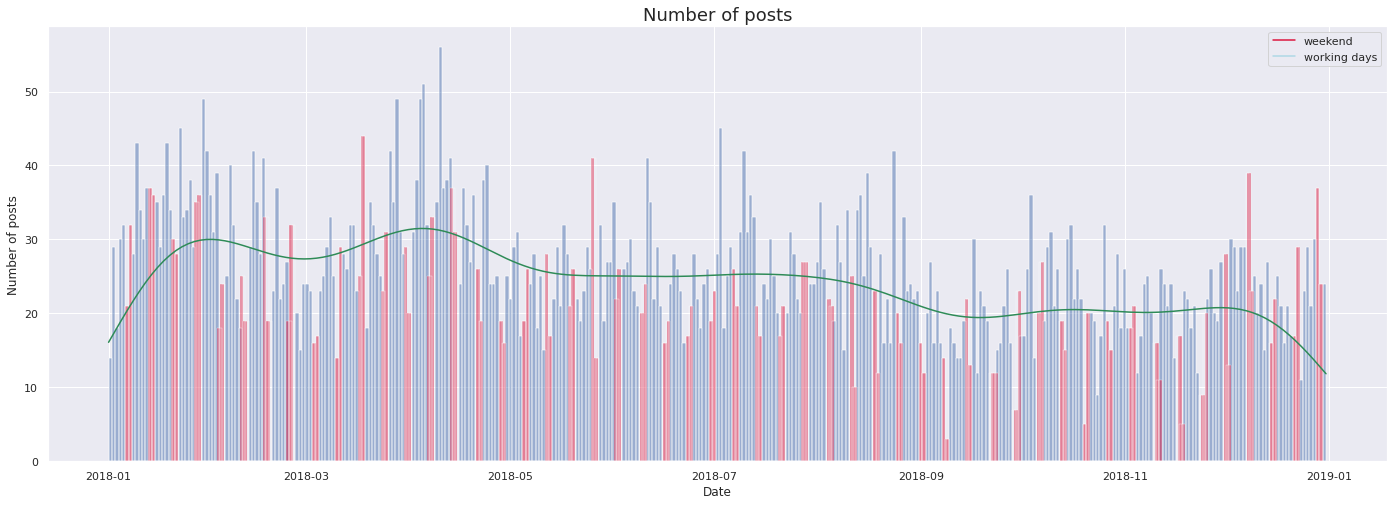

In [37]:
from xmlToDataframe import *
drawHistogram(rpi_posts, 'Number of posts', 'Number of posts', 'Date',2018)

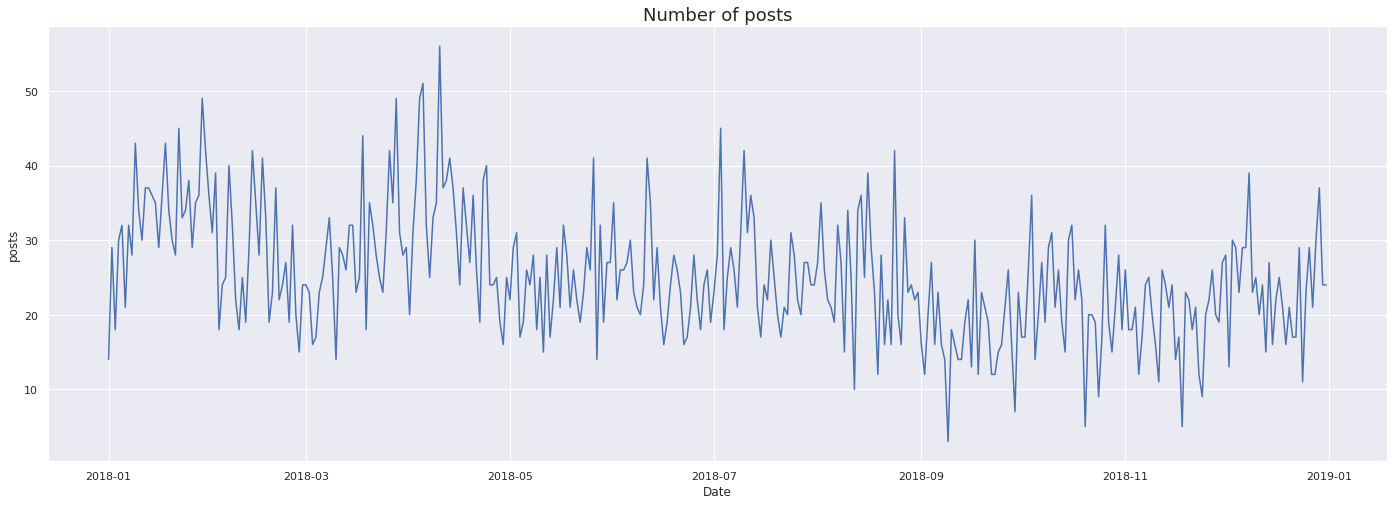

In [122]:
drawTimeSeries(rpi_posts, 2018, 'Number of posts')

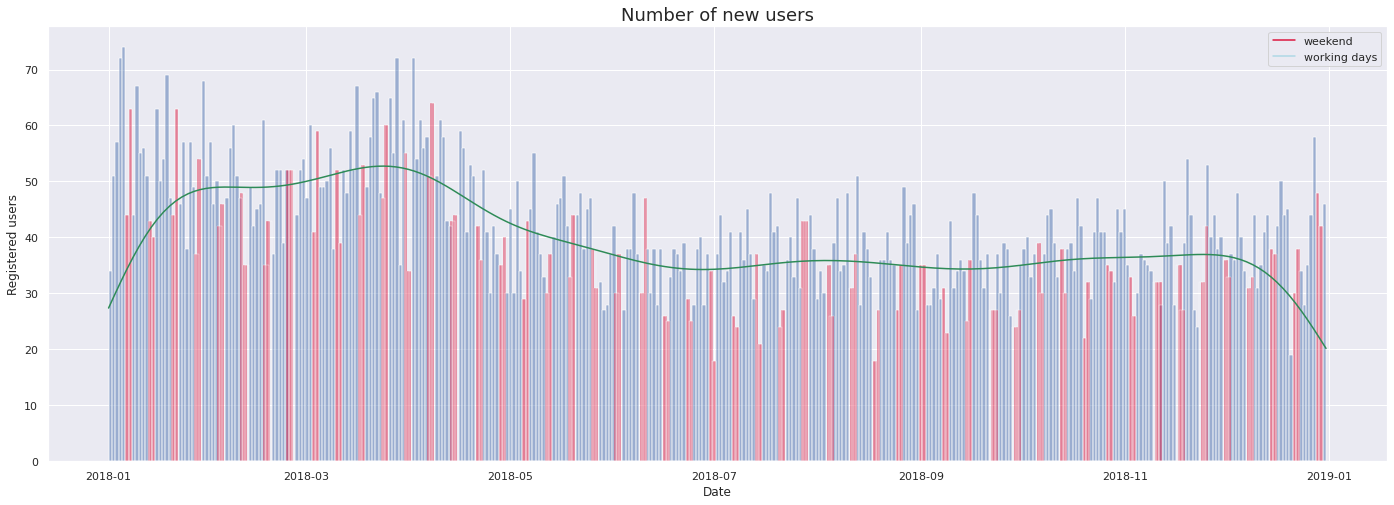

In [103]:
drawHistogram(rpi_users, 'Number of new users', 'Registered users', 'Date',2018)

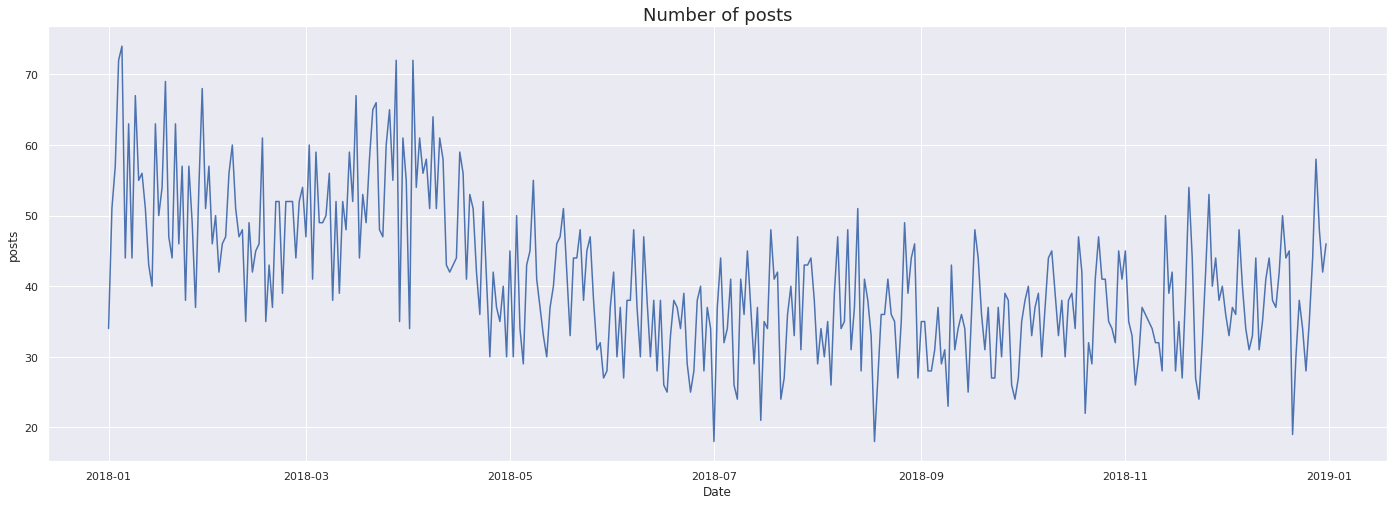

In [123]:
drawTimeSeries(rpi_users, 2018, 'Number of posts')

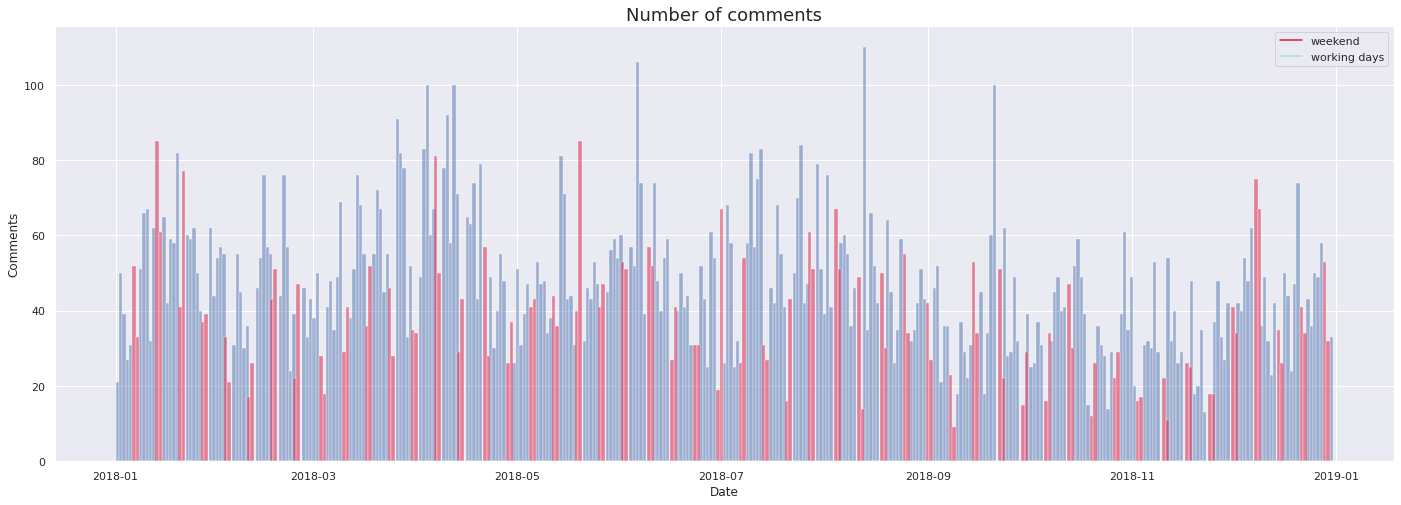

In [10]:
drawHistogram(rpi_comments, 'Number of comments', 'Comments', 'Date',2018)

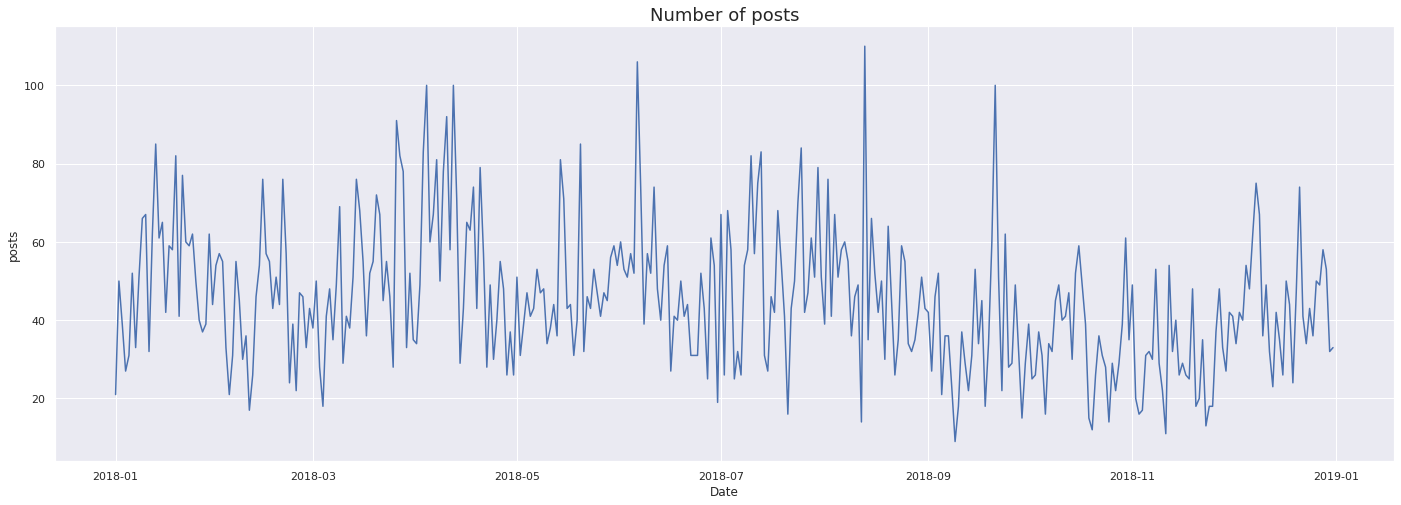

In [124]:
drawTimeSeries(rpi_comments, 2018, 'Number of posts')

<br><br>

## magento.stack.exchange

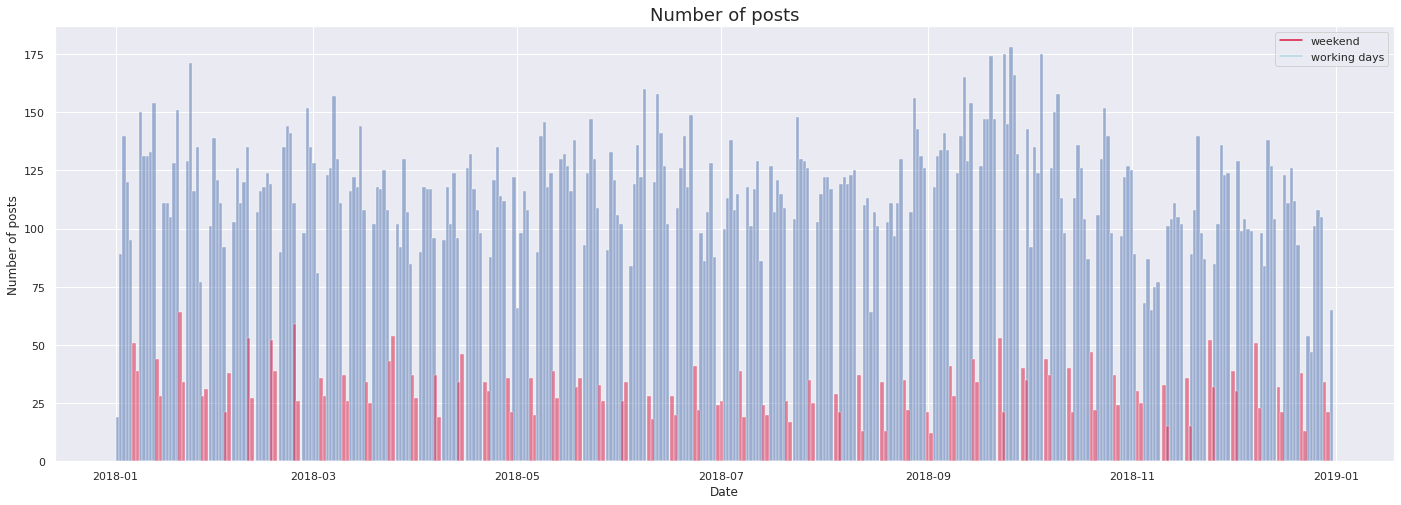

In [11]:
drawHistogram(magento_posts, "Number of posts", 'Number of posts', 'Date',2018)

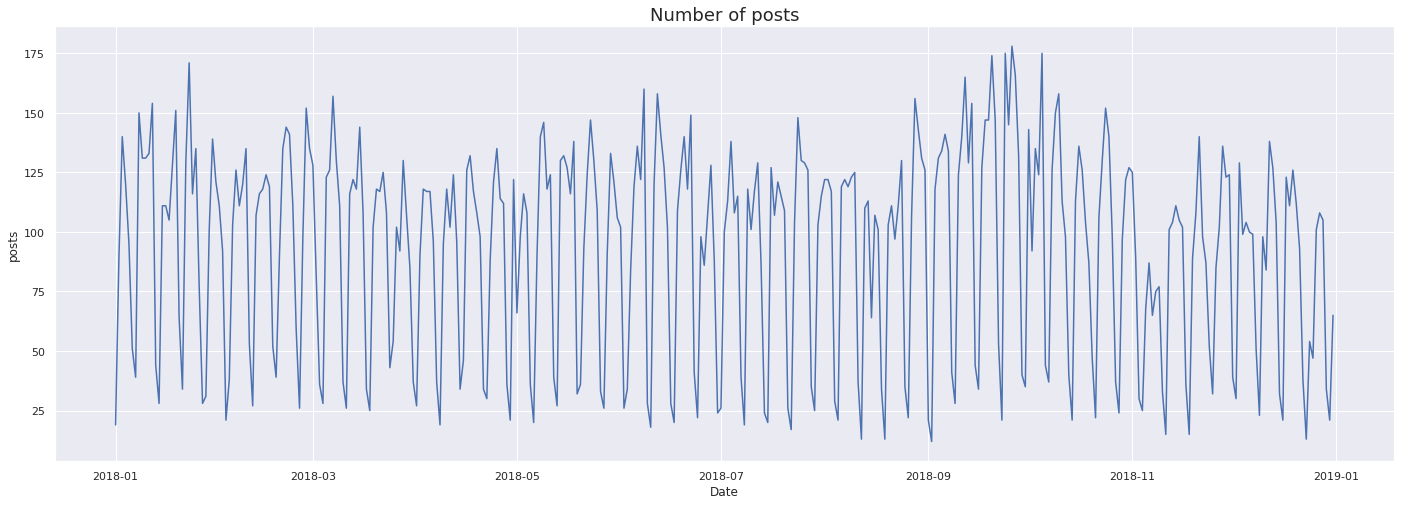

In [125]:
drawTimeSeries(magento_posts, 2018, 'Number of posts')

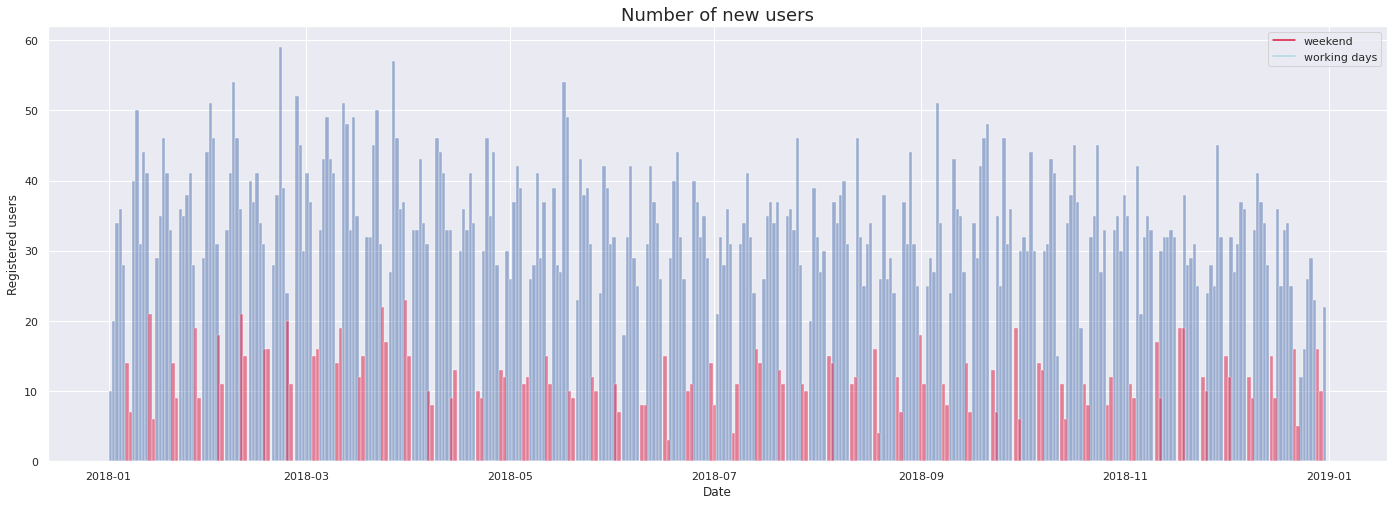

In [12]:
drawHistogram(magento_users, "Number of new users", 'Registered users', 'Date',2018)

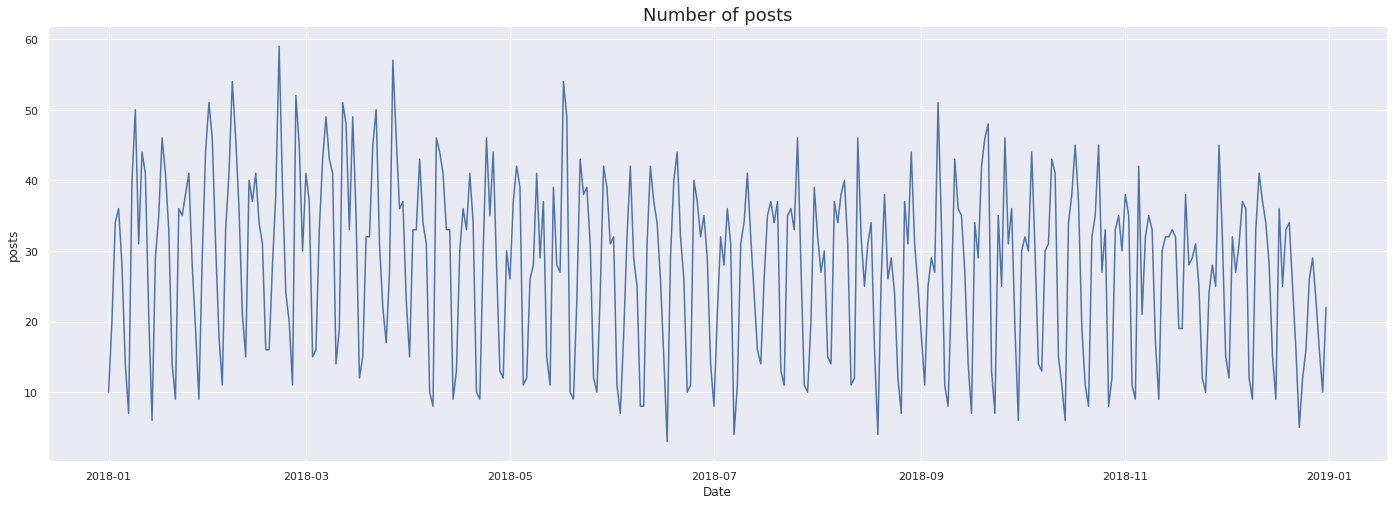

In [126]:
drawTimeSeries(magento_users, 2018, 'Number of posts')

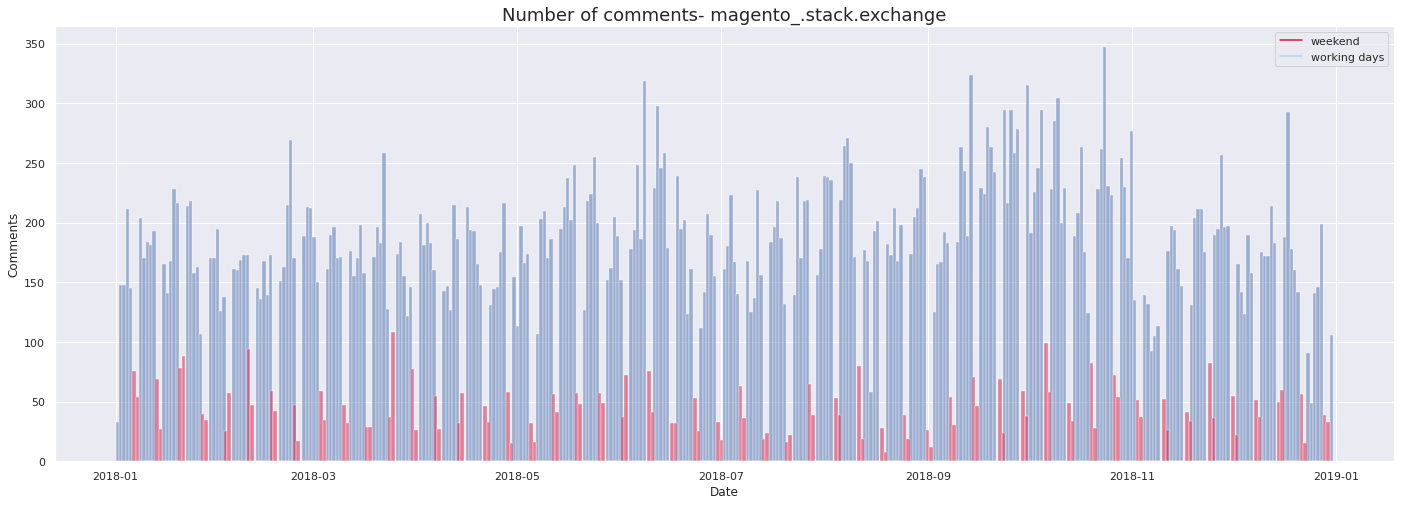

In [13]:
drawHistogram(magento_comments, "Number of comments- magento_.stack.exchange", 'Comments', 'Date',2018)

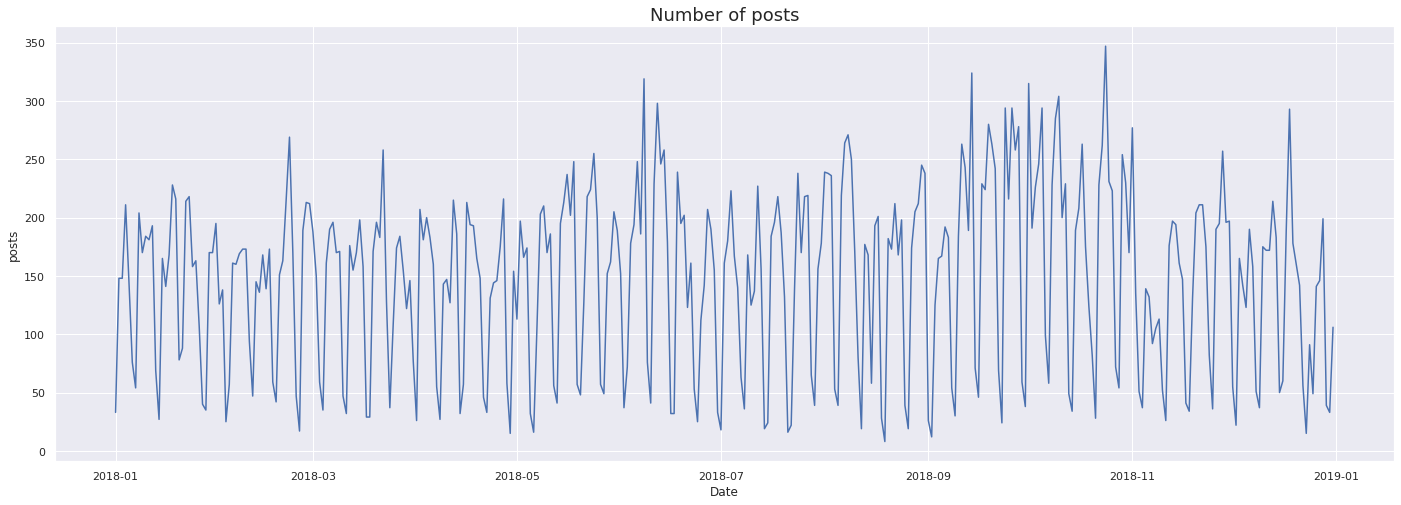

In [127]:
drawTimeSeries(magento_comments, 2018, 'Number of posts')

<br><br>

### gardening.stack.exchange

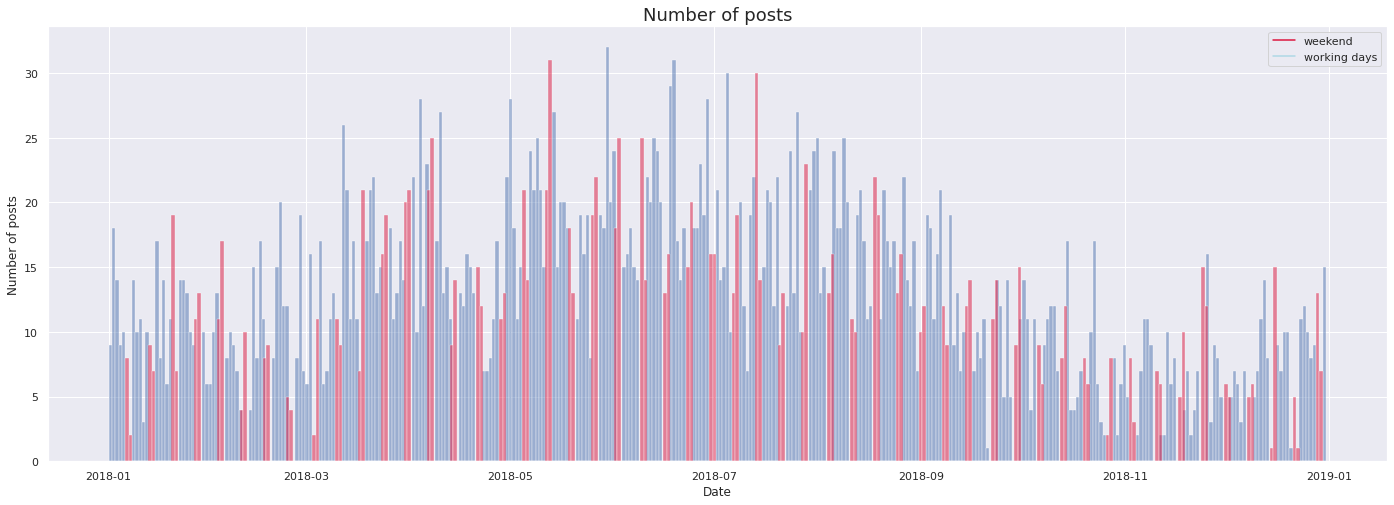

In [14]:
drawHistogram(gardening_posts, 'Number of posts', 'Number of posts', 'Date',2018)

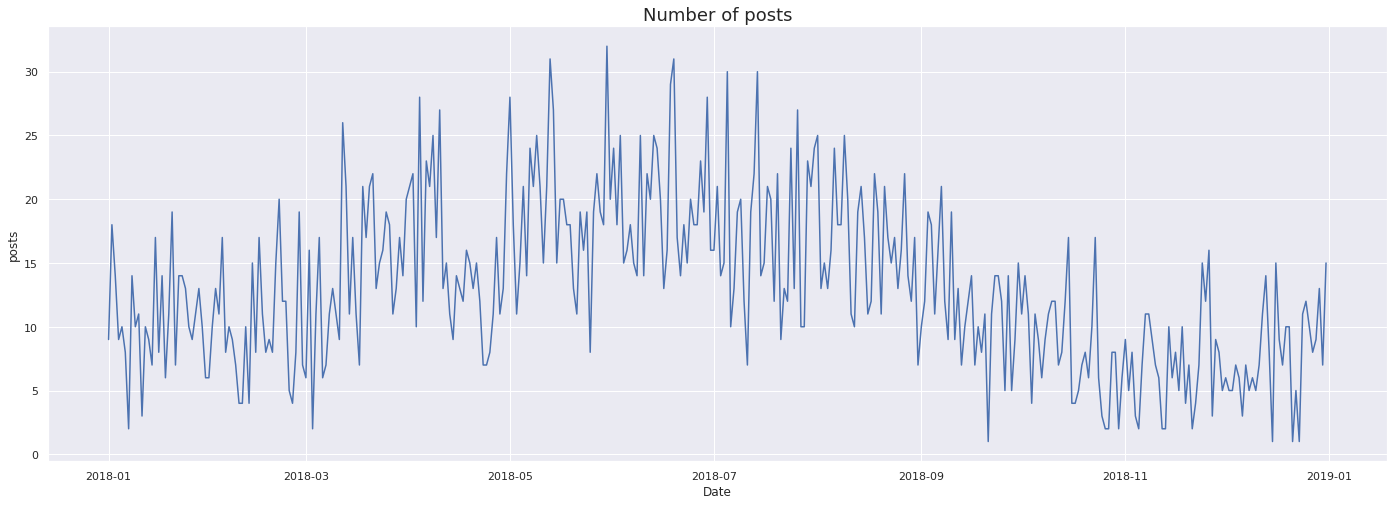

In [128]:
drawTimeSeries(gardening_posts, 2018, 'Number of posts')

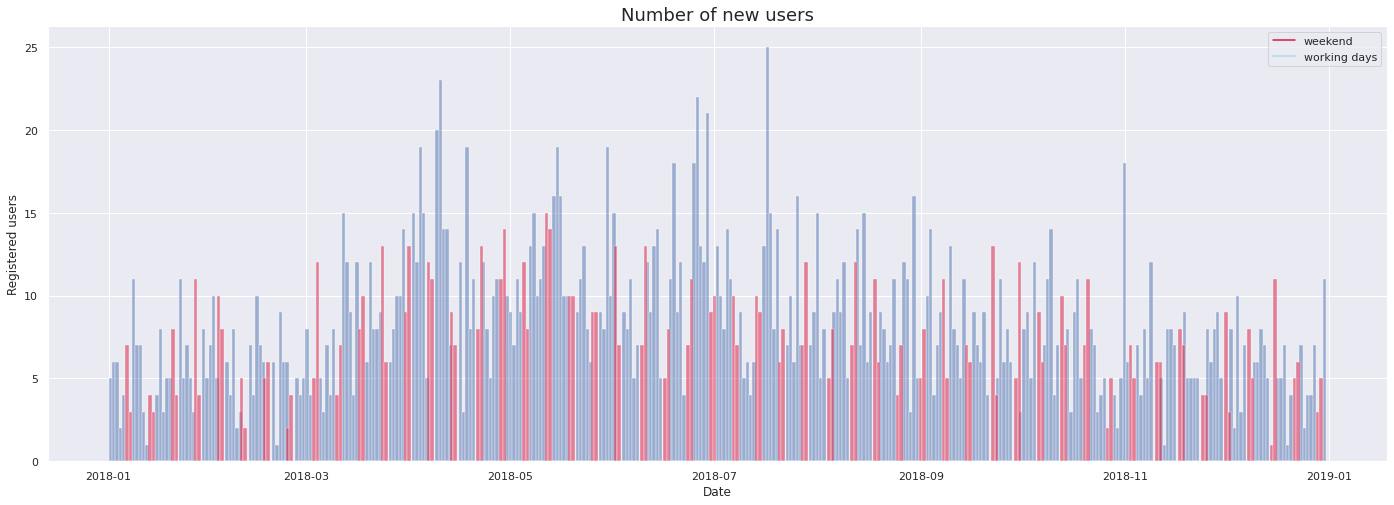

In [15]:
drawHistogram(gardening_users, 'Number of new users', 'Registered users', 'Date',2018)

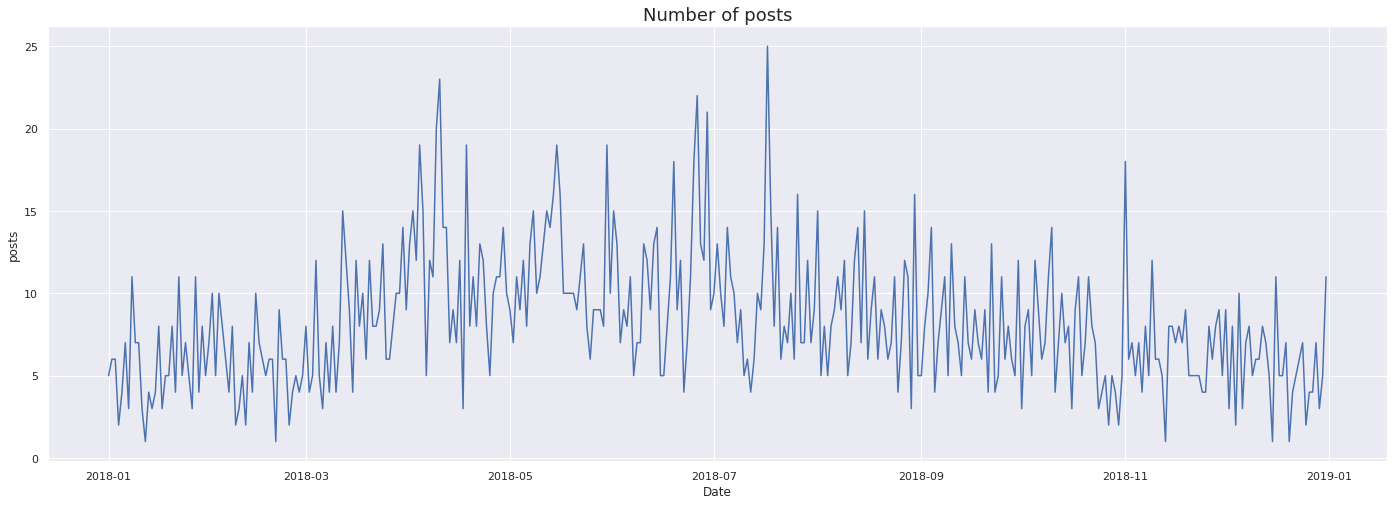

In [129]:
drawTimeSeries(gardening_users, 2018, 'Number of posts')

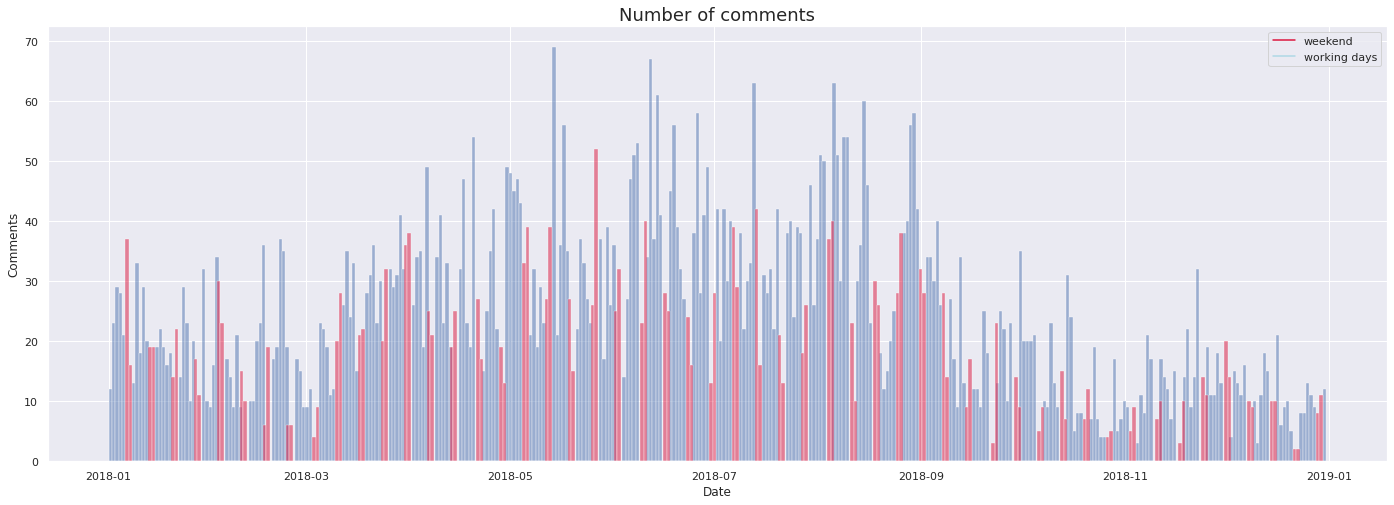

In [16]:
drawHistogram(gardening_comments, 'Number of comments', 'Comments', 'Date',2018)

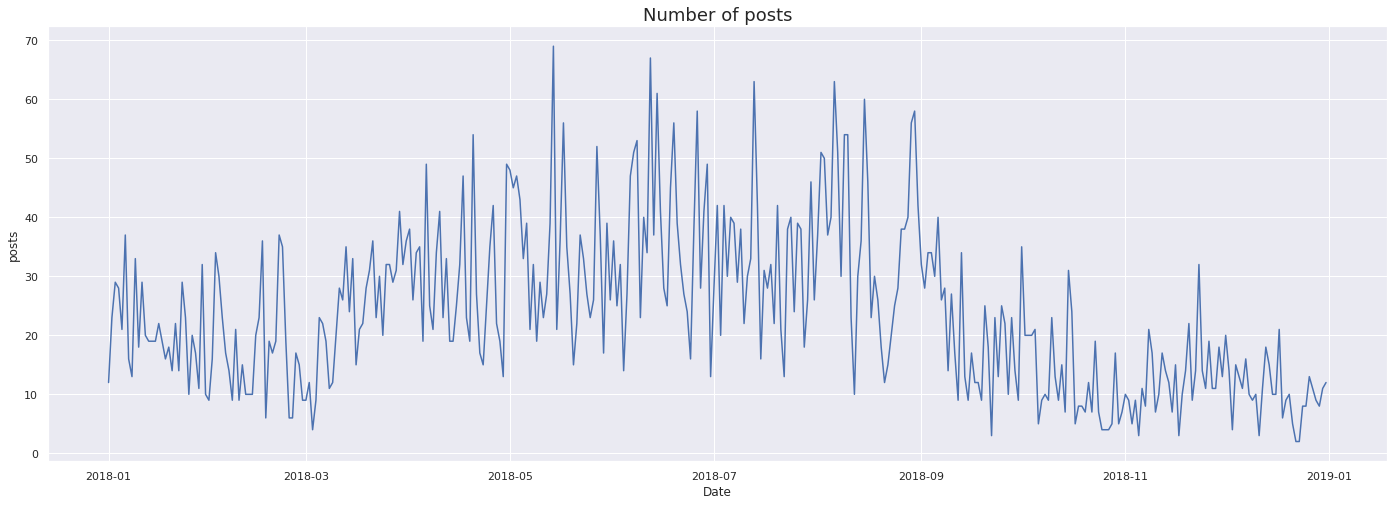

In [130]:
drawTimeSeries(gardening_comments, 2018, 'Number of posts')

<br><br>

## aviation.stack.exchange

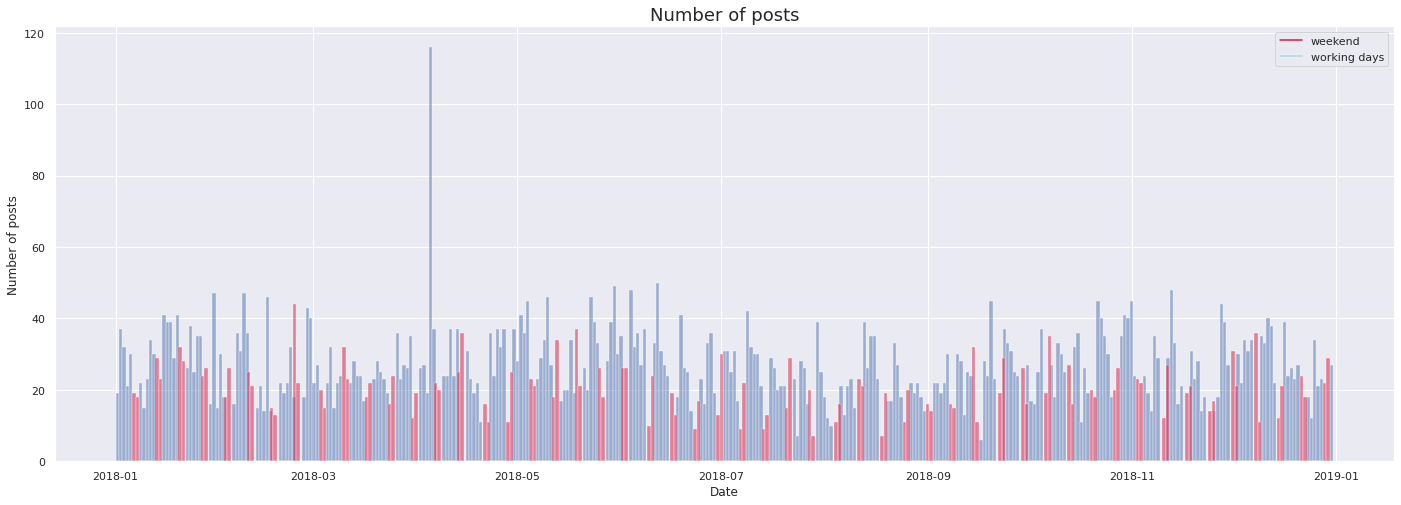

In [17]:
drawHistogram(aviation_posts, 'Number of posts', 'Number of posts', 'Date',2018)

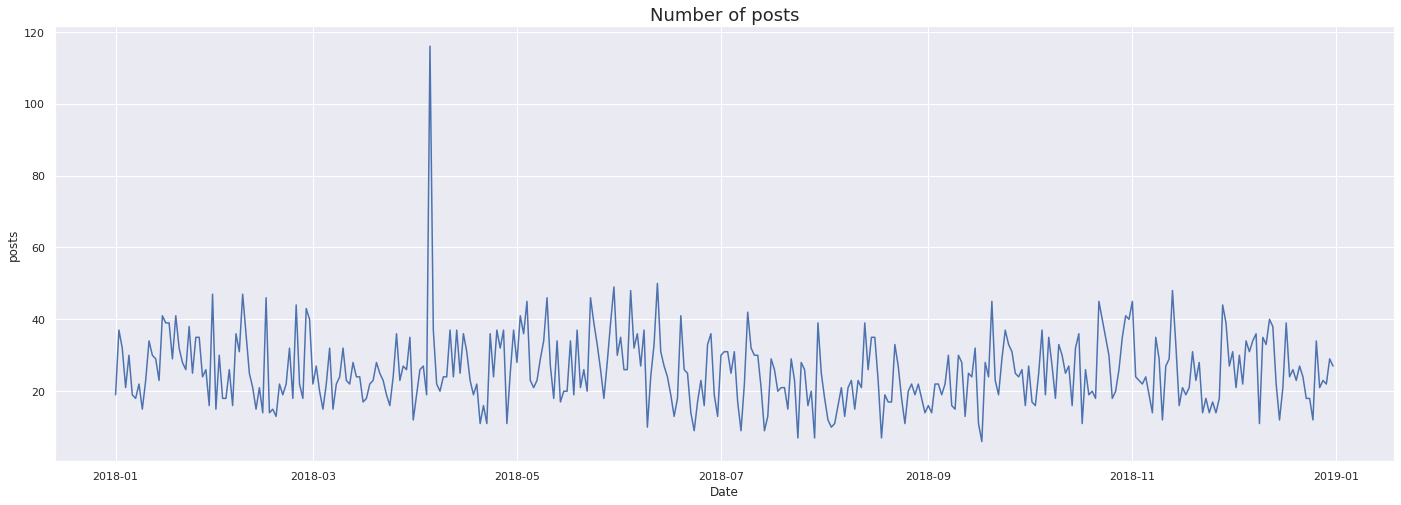

In [131]:
drawTimeSeries(aviation_posts, 2018, 'Number of posts')

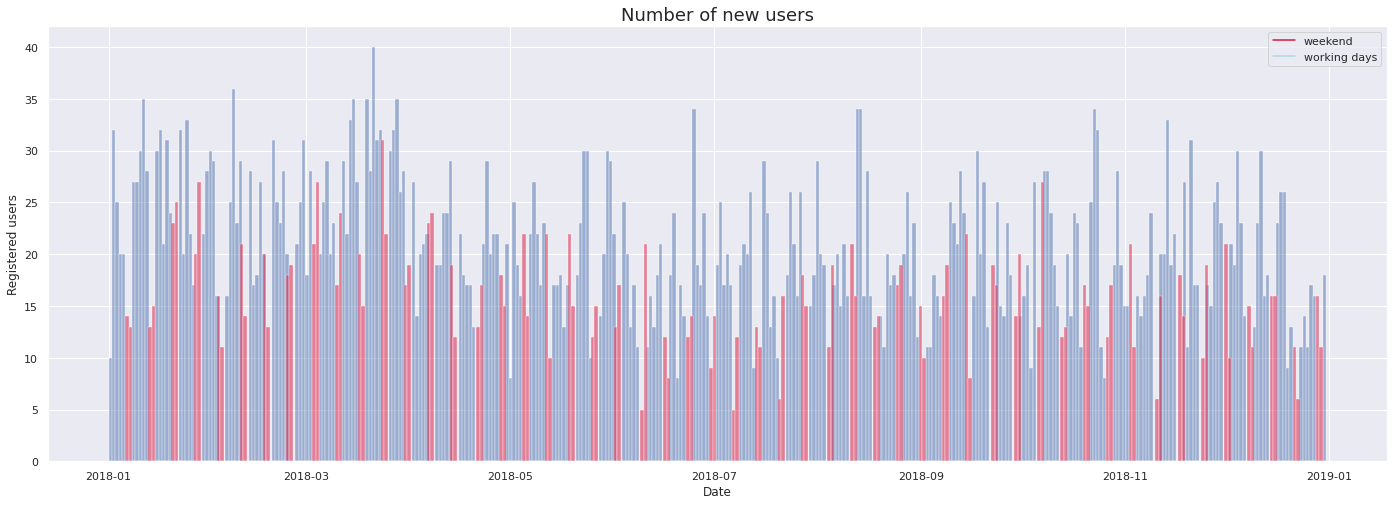

In [18]:
drawHistogram(aviation_users, 'Number of new users', 'Registered users', 'Date',2018)

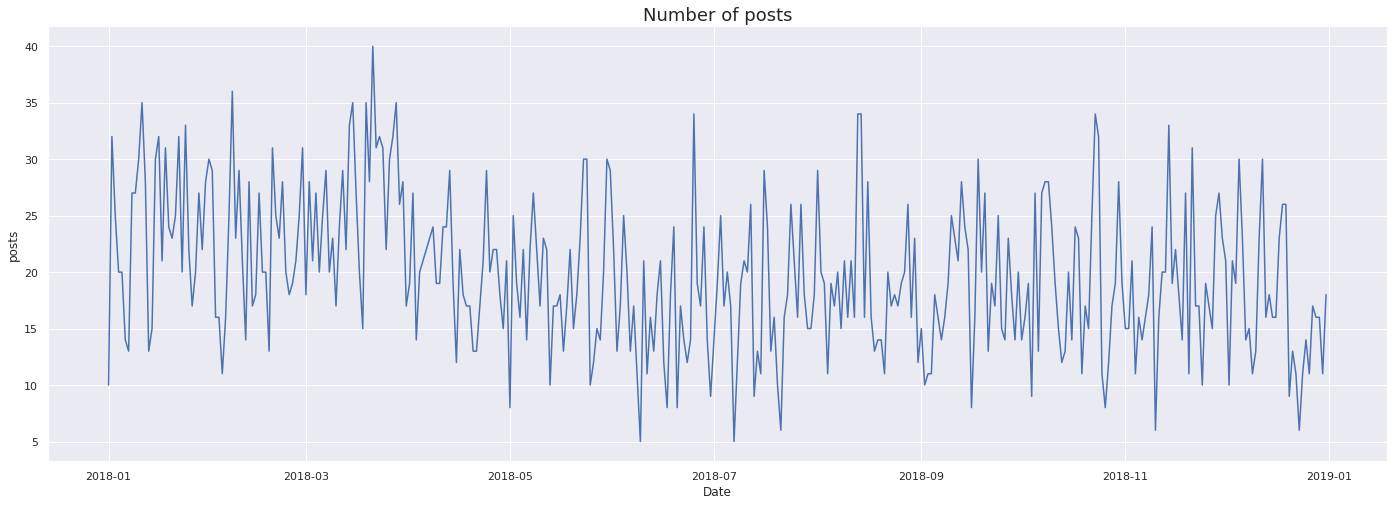

In [132]:
drawTimeSeries(aviation_users, 2018, 'Number of posts')

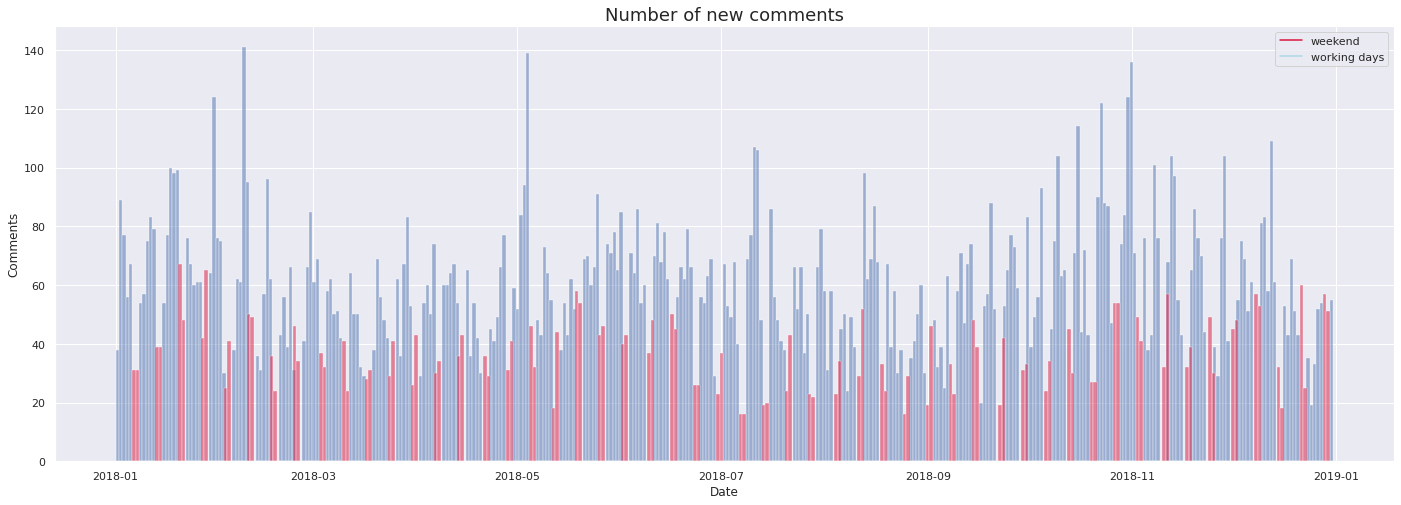

In [19]:
drawHistogram(aviation_comments, 'Number of new comments', 'Comments', 'Date',2018)

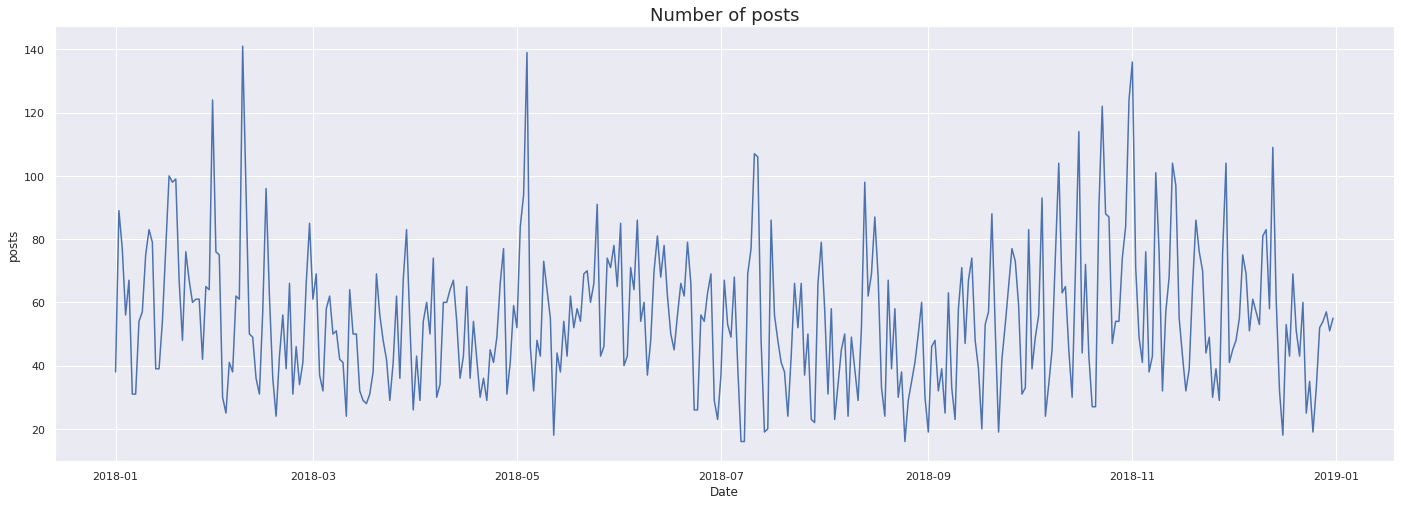

In [133]:
drawTimeSeries(aviation_comments, 2018, 'Number of posts')

<br><br>

## health.stack.exchange

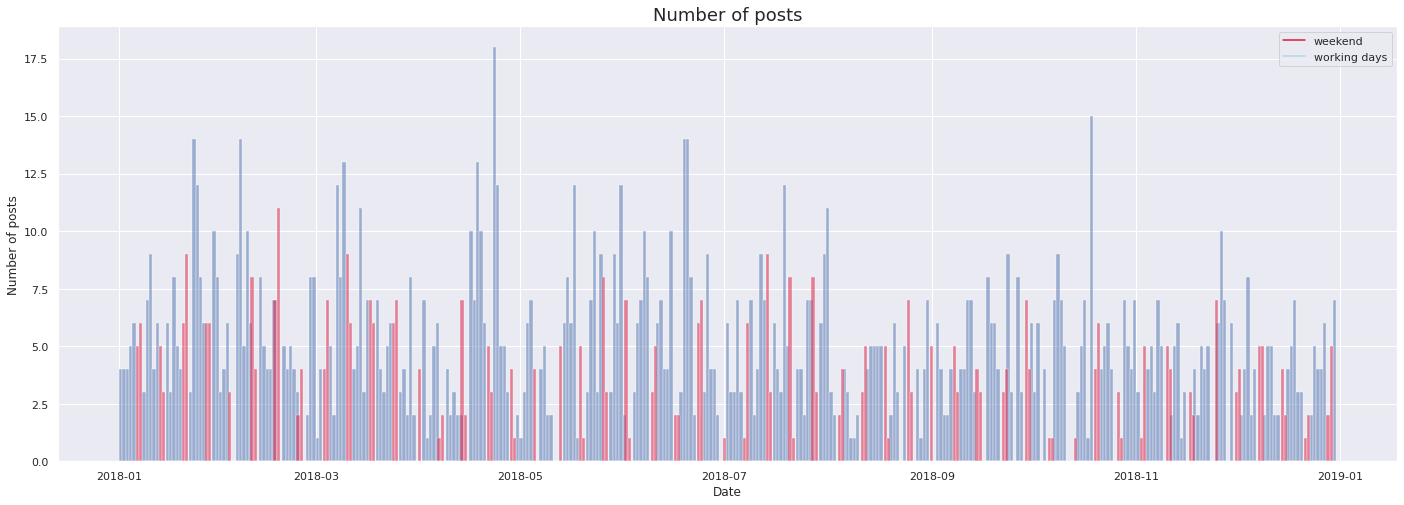

In [20]:
drawHistogram(health_posts, 'Number of posts', 'Number of posts', 'Date',2018)

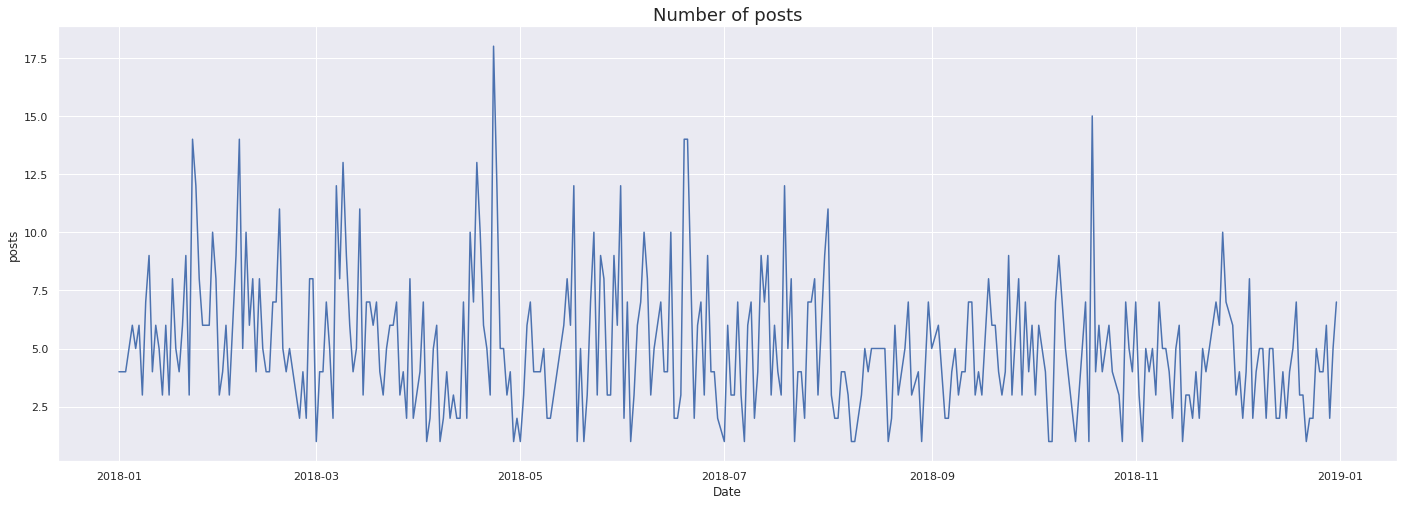

In [134]:
drawTimeSeries(health_posts, 2018, 'Number of posts')

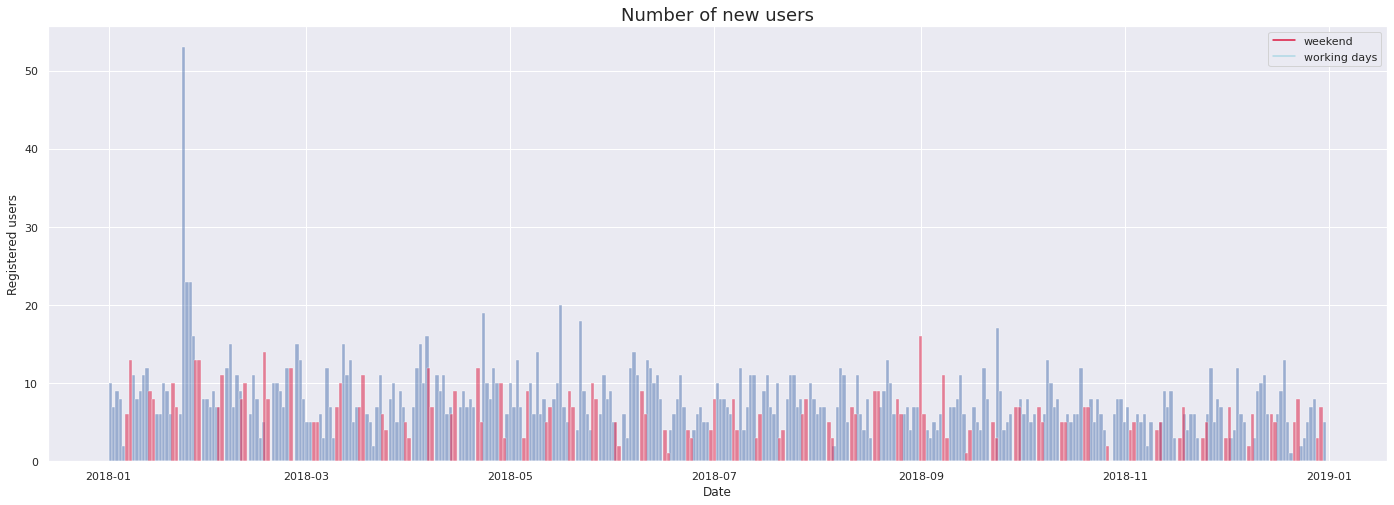

In [21]:
drawHistogram(health_users, 'Number of new users', 'Registered users', 'Date',2018)

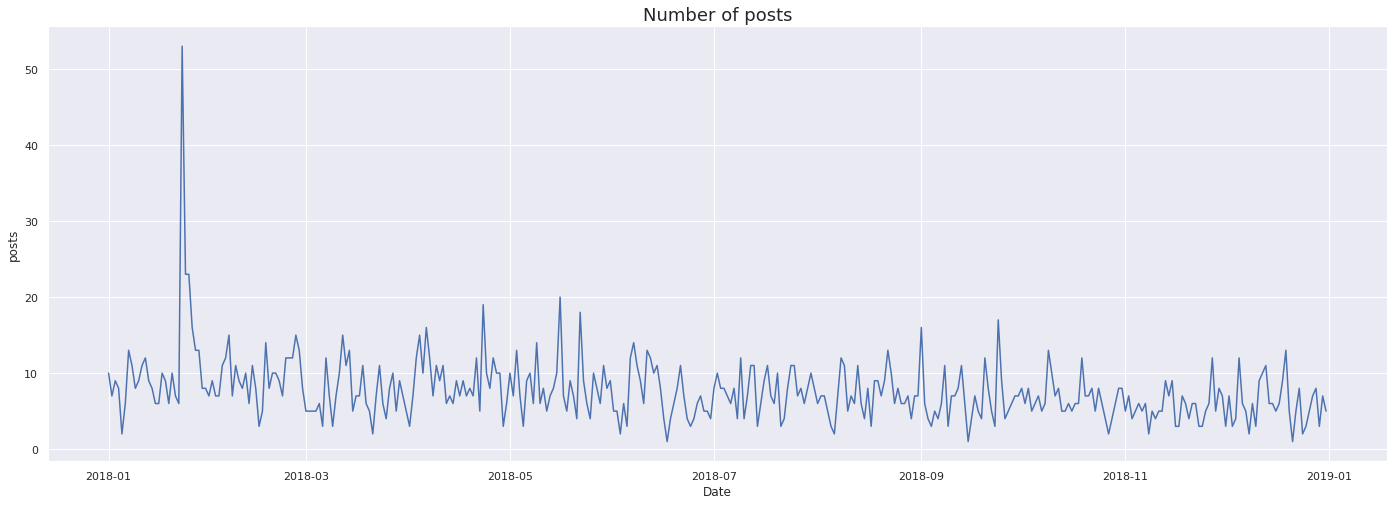

In [135]:
drawTimeSeries(health_users, 2018, 'Number of posts')

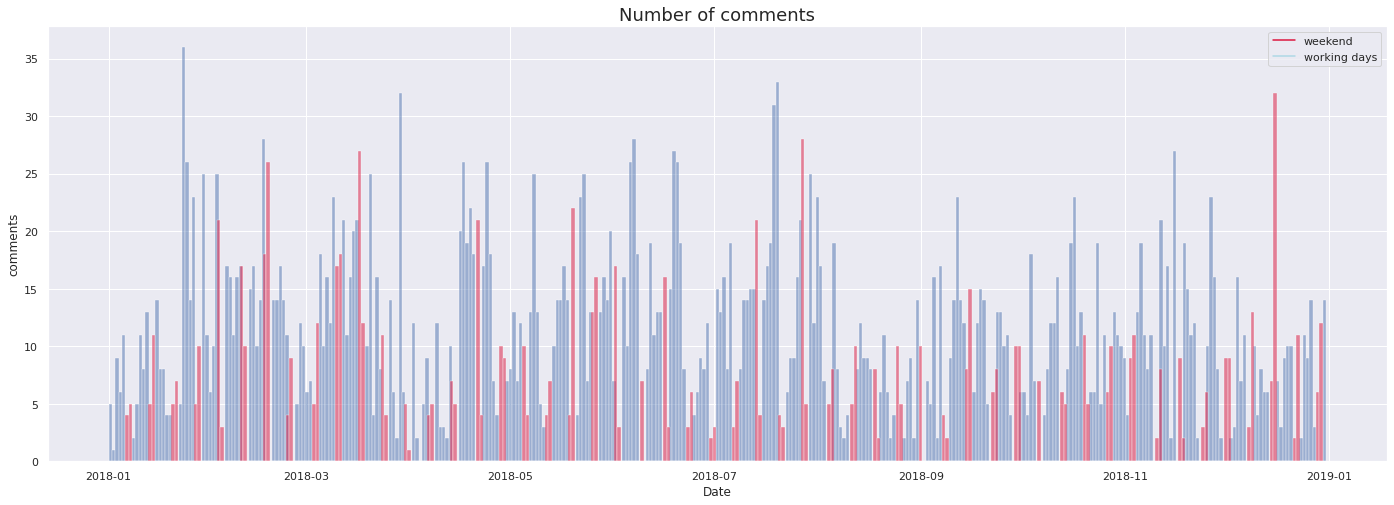

In [22]:
drawHistogram(health_comments, 'Number of comments', 'comments', 'Date',2018)

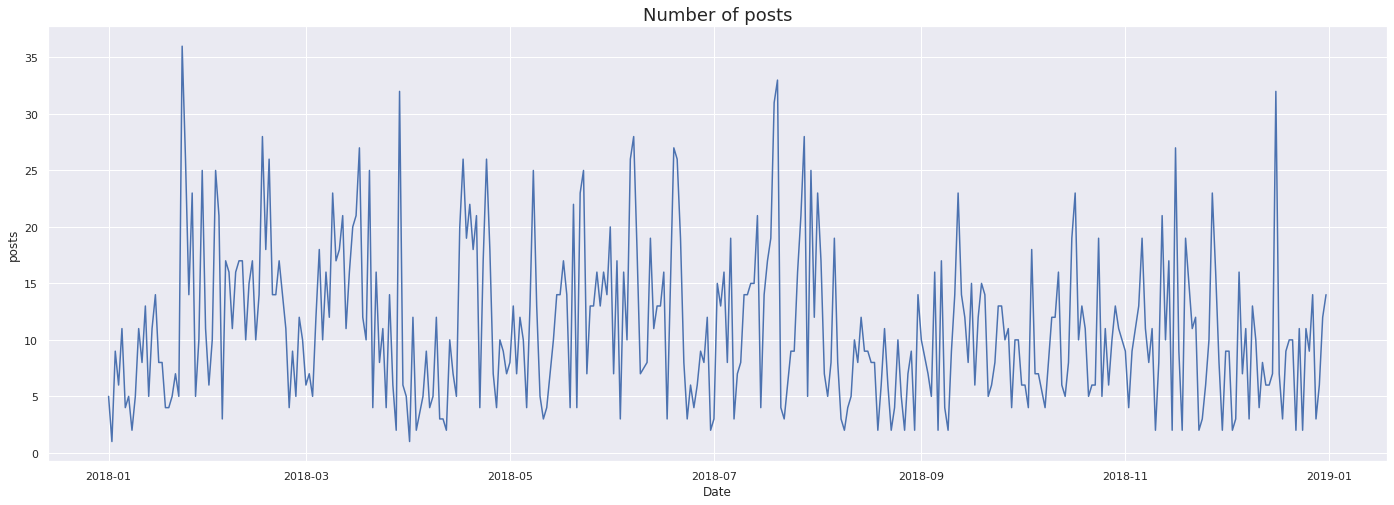

In [136]:
drawTimeSeries(health_comments, 2018, 'Number of posts')

# Raspberry pi release dates

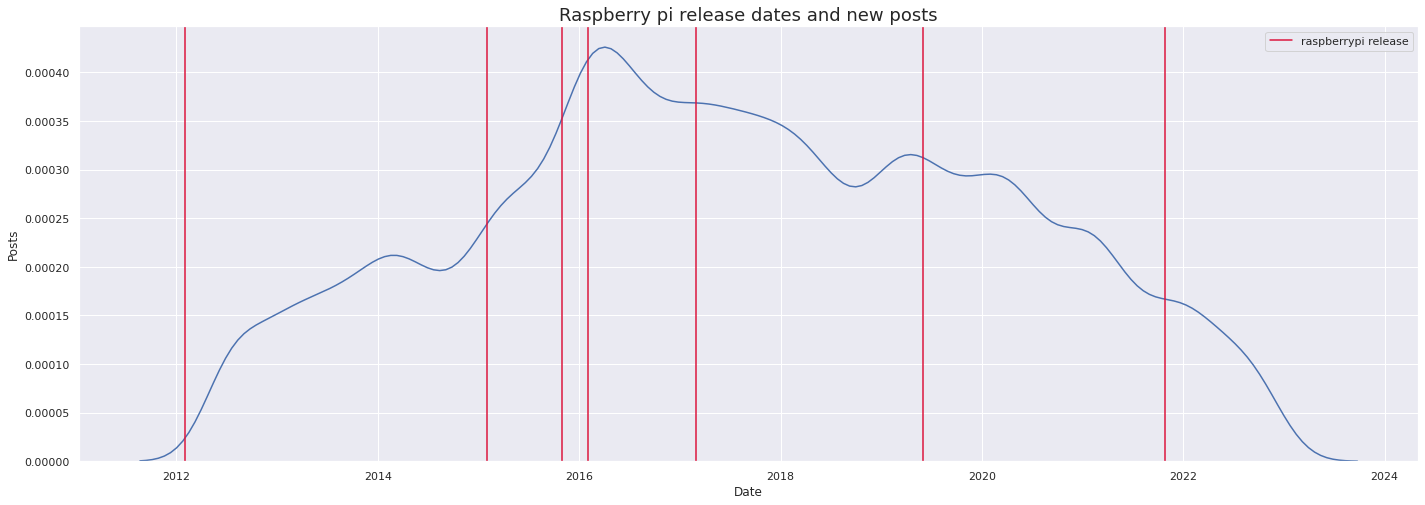

In [138]:
df = pd.DataFrame(pd.to_datetime(rpi_posts['CreationDate']).dt.date)
df.columns = ['Date']
df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots()
#plot = sns.histplot(data = df, x="Date", fill = True, bins = 100, kde = True, )
ax.set(ylabel = 'Posts')
sns.kdeplot(data=df, x="Date")


#The first-generation Raspberry Pi Model B was released in February 2012, followed by the simpler and cheaper Model A.
x = pd.to_datetime(['01022012'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#The Raspberry Pi 2 was released in February 2015 
x = pd.to_datetime(['01022015'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#A Raspberry Pi Zero with smaller size and reduced input/output (I/O) and general-purpose input/output (GPIO) capabilities was released in November 2015 for US$5.
x = pd.to_datetime(['01112015'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')


#The Raspberry Pi 3 Model B was released in February 2016 
x = pd.to_datetime(['01022016'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#On 28 February 2017, the Raspberry Pi Zero W was launched, a version of the Zero with Wi-Fi and Bluetooth capabilities, for US$10.[35][36]
x = pd.to_datetime(['28022017'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#The Raspberry Pi 4 Model B was released in June 2019[
x = pd.to_datetime(['01062019'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#On 28 October 2021, the Raspberry Pi Zero 2 W
x = pd.to_datetime(['28102021'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

b = plt.Line2D([], [], color='crimson', label='raspberrypi release')
plt.legend(handles=[b])
plt.title('Raspberry pi release dates and new posts', fontsize=18,)

plt.show()

In [24]:
# posts = Posts.loc[pd.isna(Posts["Title"]) == False, ['Title','OwnerUserId', 'CreationDate']]
# posts['CreationDate'] = pd.DataFrame(pd.to_datetime(posts['CreationDate']).dt.date)
# posts.columns = ['Title', 'OwnerUserId', 'Date']
# posts['Date'] = pd.to_datetime(posts['Date'])
# posts[posts['Date'] == '2015-02-15']

In [25]:
# Posts['CreationDate'] = pd.to_datetime(posts['Date'])
# posts[posts['Date'] == '2015-02-15']

# User countries

In [26]:
#Take sample of 10000 users with location
x = rpi_users[pd.isna(rpi_users['Location'] ) == False].sample(10000)
import random
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="find_location")


def string_to_location(address):
    try:
        location = geolocator.geocode(address, language = 'en')
        return location.latitude, location.longitude
    except:
        return None, None

location = list(x['Location'])
random.shuffle(location)

In [27]:
print(x.shape)
x.head()


(10000, 13)


,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
28517,41000,101,2016-02-04T10:57:19.543,GMchris,2016-11-15T16:21:45.557,http://www.pseudocoding.com,Bulgaria,"<p>I'm a front-end, mobile and game developer,...",2,0,0,3778945.0,NaN
107227,130780,1,2021-02-21T13:06:43.453,HolgerZ,2021-02-21T13:31:32.237,NaN,Gerlingen,NaN,0,0,0,2109642.0,NaN
121681,148373,101,2022-08-08T20:53:43.713,91378246,2022-08-08T20:53:43.713,NaN,Austria,<ul>\n<li>Private: C# developer with many pers...,0,2,0,5320515.0,https://www.gravatar.com/avatar/f86e5da8e7ee23...
84099,104404,101,2019-06-03T13:34:30.030,nmtoken,2021-02-10T12:54:33.717,NaN,"Nottingham, United Kingdom",<p>WORK: Solving geoinformatics problems @ Bri...,0,1,0,232403.0,https://i.stack.imgur.com/qXeoA.jpg?s=128&g=1
85400,105715,1,2019-07-08T18:50:53.127,Online Sid,2019-11-05T22:28:15.010,http://www.onlinesid.com,"Horowhenua District, New Zealand",NaN,0,0,0,994148.0,NaN


In [28]:
x.shape


(10000, 13)

In [ ]:
#x['Country_Data']  = x['Location'].apply(string_to_location)

In [ ]:
#x.to_pickle('rpi_users_location.pkl')
x = pd.read_pickle('rpi_users_location.pkl')

In [ ]:
x.head()

In [ ]:
import geopandas
import matplotlib.pyplot as plt

In [ ]:
gdf = geopandas.GeoDataFrame(x, geometry=geopandas.points_from_xy(x['Country_Data'].apply(lambda x: x[1]), x['Country_Data'].apply(lambda x: x[0])))

In [ ]:
gdf.head()

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(), color='red')
#Users by their given location on the Raspberry Pi Stack Exchange site
plt.show()
world.shape

In [ ]:
result = geopandas.sjoin(gdf, world, how="left")


In [ ]:
#Dissolve the data by country
result.head()

In [ ]:
users_by_country = result.groupby('name')['name'].count()
users_by_country.head()
v_min = 0 #min(users_by_country)
v_max = max(users_by_country)


In [ ]:
users_by_country_df = users_by_country.to_frame()
users_by_country_df.rename(columns={'name': 'Values'}, inplace=True)
users_by_country_df.reset_index(inplace=True)
users_by_country_df.head(10)
#get columns with value 0

users_by_country_df[users_by_country_df['Values'] != 0] #It prings 125 countries so each countri has at least one user?????
users_by_country_df[users_by_country_df['Values'].isnull() == True] #It prints 0 rows so there are no null values


In [ ]:
users_by_country_df.head()


In [ ]:
world.head()

In [ ]:
print(world.shape)
heat_map = world.merge(users_by_country_df, on='name', how='left')
print(heat_map.shape)

heat_map.drop(columns=['pop_est', 'continent', 'iso_a3', 'gdp_md_est'], inplace=True)
heat_map.fillna(0, inplace=True)
heat_map.head()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
cmap = 'viridis'
heat_map.plot(column="Values", ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title('title', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('source', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=v_min, vmax=v_max), cmap=cmap)
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
plt.show()
plt.savefig('users_by_country.png')
